In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "./sims/flexible_scales/"
scales = np.linspace(0.1,0.7,13)

In [3]:
scales

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 ])

In [4]:
means = []
var = []
for s in scales:
    dfs = []
    m = []
    v = []
    for i in range(10):
        filename = path + "flexible_{}_{}".format(round(s,2),i)
        dfs.append(pd.read_csv(filename, names=['total_cost', 'true_demand', 'demand_sd', '2x_sup_sd', 'ren_sup', 'rem_demand']))
        try:
            dfs[i] = dfs[i].drop(730)
        except:
            pass
        dfs[i]["total_cost"] = pd.to_numeric(dfs[i]["total_cost"], downcast="float")
        dfs[i]['avg_cost'] = dfs[i]['total_cost'] / dfs[i]['true_demand']
        m.append(dfs[i]['avg_cost'].mean())
        v.append((dfs[i]['avg_cost'].var()))
    m = np.array(m)
    v = np.array(v)
    means.append(m.mean())
    var.append(v.mean())


In [5]:
var

[162.69376287072959,
 141.8992369390944,
 127.06570326605215,
 116.37807022900174,
 116.64448366835423,
 107.38883279104975,
 95.5863090386691,
 87.31338725625366,
 75.14732887803962,
 64.22614547971372,
 57.27738632085177,
 48.4614772564962,
 40.074992180405154]

In [8]:
plt.rcParams["figure.figsize"] = (12,8)

In [9]:
capacities = [round(7000000 * x) / 1000000 for x in scales]

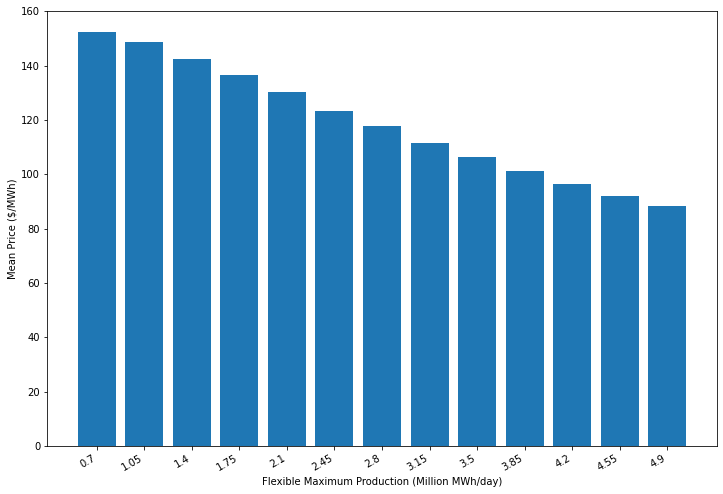

In [13]:
fig,ax = plt.subplots()
ax.bar(np.arange(13),means,tick_label=capacities)
ax.set_xticklabels(capacities, rotation=30, ha='right')
ax.set_xlabel("Flexible Maximum Production (Million MWh/day)")
ax.set_ylabel("Mean Price ($/MWh)")
plt.savefig("flex_prod_vs_avg_price_sensitivity.png")

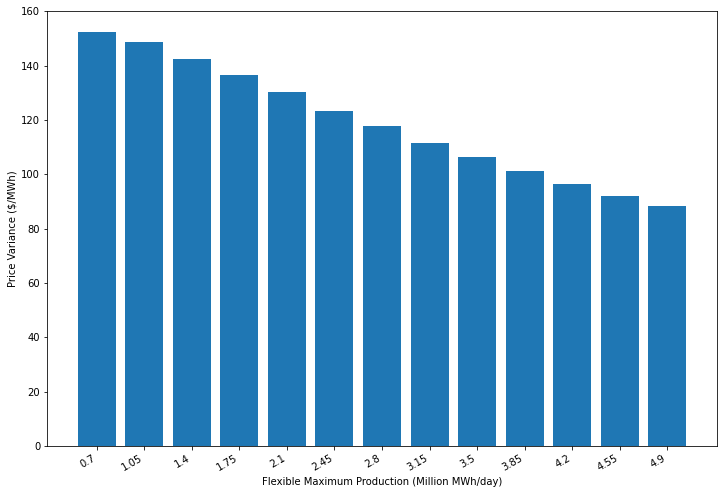

In [14]:
fig,ax = plt.subplots()
ax.bar(np.arange(13),means,tick_label=capacities)
ax.set_xticklabels(capacities, rotation=30, ha='right')
ax.set_xlabel("Flexible Maximum Production (Million MWh/day)")
ax.set_ylabel("Price Variance ($/MWh)")
plt.savefig("flex_prod_vs_price_variance_sensitivity.png")